## RATINGS PREDICTION`

We have a client who has a website where people write different reviews for technical products.
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating)
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars,
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the
past and they don’t have a rating. So, we have to build an application which can predict the rating
by seeing the review.

## Data Collection Phase

## Web Scraping

In [104]:
#i have scapred 20,000 rows of data for diffrent products

In [105]:
#please find my ipynb file of web scraping in below link

https://github.com/UllasKc/Flip-Robo-Internship/blob/main/RATINGS%20PREDICTION%20WEB%20SCRAPING.ipynb

In [106]:
#merginng the dataframes 

https://github.com/UllasKc/Flip-Robo-Internship/blob/main/Rating%20prediction%20df_merging.ipynb

In [107]:
#S0 lets scrape 20,000 from rows of data for each rating where every ratings will be 4000 each

#4000 reviews for each rating 1,2,3,4,5 will be scraped  to balance the dataset

## Importing all the required libraries

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from bs4 import BeautifulSoup

import nltk
from nltk.tokenize import word_tokenize,regexp_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

import gensim
from gensim import corpora
from pprint import pprint
from gensim.utils import simple_preprocess
import os


## Loading the dataset:

In [109]:
#dataset 1
df_ratings = pd.read_csv('df_final_ratins_f.csv')
df_ratings.head()

,Unnamed: 0,Unnamed: 0.1,Ratings,Summary,Review,Product
0,0,0,5,Highly recommended,Great Phone at this Price point. Superb cool D...,Mobile
1,1,1,4,Really Nice,"Good mobile poco m3\nPros:\nFullhd display,\ns...",Mobile
2,2,2,5,Wonderful,Good phone battery🔋 And camera This price poin...,Mobile
3,3,3,5,Terrific,"One word review "" Value for Money""\nIt has the...",Mobile
4,4,4,4,Worth the money,Sound quality super 3 type sound but camera se...,Mobile


In [110]:
df_ratings.drop(["Unnamed: 0",'Unnamed: 0.1'],axis = 1,inplace= True)

In [111]:
df_ratings.head()

,Ratings,Summary,Review,Product
0,5,Highly recommended,Great Phone at this Price point. Superb cool D...,Mobile
1,4,Really Nice,"Good mobile poco m3\nPros:\nFullhd display,\ns...",Mobile
2,5,Wonderful,Good phone battery🔋 And camera This price poin...,Mobile
3,5,Terrific,"One word review "" Value for Money""\nIt has the...",Mobile
4,4,Worth the money,Sound quality super 3 type sound but camera se...,Mobile


## EDA (Exploratory Data Analysis)

In [112]:
#i have scapred 4 columns
#1. Ratings
#2. Summary
#3. Review
#4. Product

In [113]:
#lets check for null values in this datset
df_ratings.isnull().sum()

Ratings    0
Summary    1
Review     0
Product    0
dtype: int64

In [114]:
#we have one null value in summary
#lets check it out
df_ratings.loc[df_ratings['Summary'].isnull()]

,Ratings,Summary,Review,Product
3803,5,NaN,I bought this phone for my mother and i found ...,Mobile


In [115]:
#since it only one row, lets drop it
df_ratings.dropna(inplace=True)

In [116]:
#lets check for null values in this datset
df_ratings.isnull().sum()

Ratings    0
Summary    0
Review     0
Product    0
dtype: int64

In [117]:
#now there are no null values

In [118]:
#we have 20594 rows for review
#18005 unique values 
#"GOOD" is the top review
df_ratings.Review.describe()

count     20594
unique    18005
top        Good
freq        450
Name: Review, dtype: object

In [119]:
#lets check for class imbalance problem
df_ratings.Ratings.value_counts()

2    4168
1    4167
4    4100
5    4099
3    4060
Name: Ratings, dtype: int64

In [120]:
#our data set balanced with almost 4100 ratings for evry review

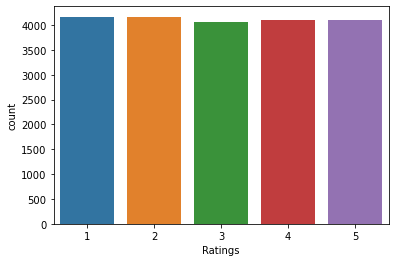

In [121]:
#count plot
sns.countplot(df_ratings.Ratings)
plt.show()

In [122]:
#we can see that our data is very much balanced for each review with 4000 reviews for every rating

In [123]:
#lets check out list of electronic products we scraped
df_ratings.Product.value_counts()

Mobile                  7207
Smart TV                3740
Smart Watch             1600
Router                  1556
Printer                 1100
Bluetooth Earphone      1000
Bluetooth Headphones     997
Home Teatre              800
Air Pods                 800
Smart Wrist Band         795
Ear Phones               549
Camera                   450
Name: Product, dtype: int64

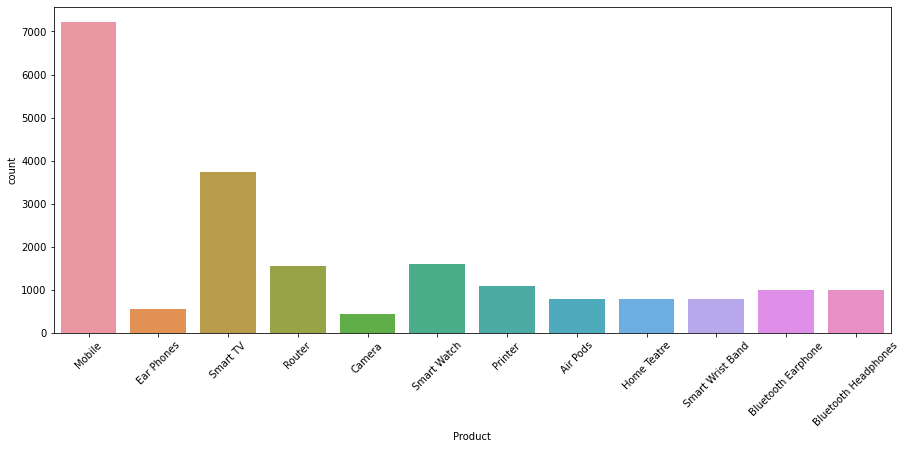

In [124]:
#count plot of products list scraped
plt.figure(figsize=(15,6))
sns.countplot(df_ratings.Product)
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [125]:
stopset =set(stopwords.words('english')+['i','u','ur','4','2','im','dont','doin','ure'])
len(stopset)

187

In [126]:
punc = set(string.punctuation + '‘’,:”][]``'+'``')
print(punc)
print(len(punc))

{"'", '-', ':', '|', ']', '‘', '&', ',', '@', ';', '/', '>', '?', '%', '\\', '}', '[', '#', '~', '=', '.', '{', '<', '`', ')', '*', '(', '’', '^', '"', '!', '”', '_', '+', '$'}
35


In [127]:
df_ratings.Review.head()

0    Great Phone at this Price point. Superb cool D...
1    Good mobile poco m3\nPros:\nFullhd display,\ns...
2    Good phone battery🔋 And camera This price poin...
3    One word review " Value for Money"\nIt has the...
4    Sound quality super 3 type sound but camera se...
Name: Review, dtype: object

In [128]:
#Now lets merge summary and review column
df_ratings['Contat_Review'] = df_ratings.Summary + " " + df_ratings.Review

In [129]:
#lets create a column called lenght
df_ratings['Concat_Length'] = df_ratings.Contat_Review.str.len()

In [130]:
df_ratings.head()

,Ratings,Summary,Review,Product,Contat_Review,Concat_Length
0,5,Highly recommended,Great Phone at this Price point. Superb cool D...,Mobile,Highly recommended Great Phone at this Price p...,173
1,4,Really Nice,"Good mobile poco m3\nPros:\nFullhd display,\ns...",Mobile,Really Nice Good mobile poco m3\nPros:\nFullhd...,356
2,5,Wonderful,Good phone battery🔋 And camera This price poin...,Mobile,Wonderful Good phone battery🔋 And camera This ...,130
3,5,Terrific,"One word review "" Value for Money""\nIt has the...",Mobile,"Terrific One word review "" Value for Money""\nI...",516
4,4,Worth the money,Sound quality super 3 type sound but camera se...,Mobile,Worth the money Sound quality super 3 type sou...,168


In [131]:
#filtering all the non alphabetic words
#df_ratings['Clened Review'] = df_ratings.Final_Review.filter(regex='[^a-z]+')

In [132]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [133]:
def cleaning(text):
    text = text.lower()
    
    #Removing the html strips
    text = strip_html(text)
    
    #removing stopwords and punctuations
    text = " ".join([word for word in word_tokenize(text) if word not in stopset if word not in punc])
    
    #alpha numeric words
    text=re.sub('\w*\d+\w*','',text)
    
    text=re.sub('\[.*?\]','',text)
    
    #ectra punctiations
    text=re.sub('[''"",,,]','',text)
    
    #removing \n
    text=re.sub('\n','',text)
    
    #replacing numbers
    text = re.sub(r'\[[0-9]*\]', ' ',text)
    
    #replacing single characters
    text = re.sub(r'\s[A-Za-z0-9]\s','',text)
    
    #replacing single digits
    text = re.sub(r'\d+',' ',text)
    
    #replacing other charcters with space
    text = re.sub(r'[^a-zA-z0-9\s]+',' ',text)
    
    #replacing more than one white spaces
    text = re.sub(r'\s+',' ',text)
    
    return text

In [134]:
cleaned = lambda x : cleaning(x)

In [135]:
df_ratings['Review_Final'] = df_ratings.Contat_Review.apply(cleaned)

In [136]:
df_ratings.head()

,Ratings,Summary,Review,Product,Contat_Review,Concat_Length,Review_Final
0,5,Highly recommended,Great Phone at this Price point. Superb cool D...,Mobile,Highly recommended Great Phone at this Price p...,173,highly recommended great phone price point sup...
1,4,Really Nice,"Good mobile poco m3\nPros:\nFullhd display,\ns...",Mobile,Really Nice Good mobile poco m3\nPros:\nFullhd...,356,really nice good mobile poco pros fullhd displ...
2,5,Wonderful,Good phone battery🔋 And camera This price poin...,Mobile,Wonderful Good phone battery🔋 And camera This ...,130,wonderful good phone battery camera price poin...
3,5,Terrific,"One word review "" Value for Money""\nIt has the...",Mobile,"Terrific One word review "" Value for Money""\nI...",516,terrific one word review `` value money potent...
4,4,Worth the money,Sound quality super 3 type sound but camera se...,Mobile,Worth the money Sound quality super 3 type sou...,168,worth money sound quality super type sound cam...


In [137]:
df_ratings['Length_Final'] = df_ratings.Review_Final.str.len()

In [138]:
df_ratings.head()

,Ratings,Summary,Review,Product,Contat_Review,Concat_Length,Review_Final,Length_Final
0,5,Highly recommended,Great Phone at this Price point. Superb cool D...,Mobile,Highly recommended Great Phone at this Price p...,173,highly recommended great phone price point sup...,147
1,4,Really Nice,"Good mobile poco m3\nPros:\nFullhd display,\ns...",Mobile,Really Nice Good mobile poco m3\nPros:\nFullhd...,356,really nice good mobile poco pros fullhd displ...,296
2,5,Wonderful,Good phone battery🔋 And camera This price poin...,Mobile,Wonderful Good phone battery🔋 And camera This ...,130,wonderful good phone battery camera price poin...,98
3,5,Terrific,"One word review "" Value for Money""\nIt has the...",Mobile,"Terrific One word review "" Value for Money""\nI...",516,terrific one word review `` value money potent...,325
4,4,Worth the money,Sound quality super 3 type sound but camera se...,Mobile,Worth the money Sound quality super 3 type sou...,168,worth money sound quality super type sound cam...,133


## Lemmatization

In [139]:
from nltk.stem import WordNetLemmatizer,PorterStemmer

In [140]:
lemma = WordNetLemmatizer()
porter = PorterStemmer()

In [141]:
def lemmatize(text):
    text = text.lower()
    text = " ".join([lemma.lemmatize(word,pos='v') for word in word_tokenize(text) if word not in punc])
    return text

In [142]:
df_ratings['cleaned_review'] = df_ratings.Review_Final.apply(lambda x : lemmatize(x))

In [143]:
df_ratings.head()

,Ratings,Summary,Review,Product,Contat_Review,Concat_Length,Review_Final,Length_Final,cleaned_review
0,5,Highly recommended,Great Phone at this Price point. Superb cool D...,Mobile,Highly recommended Great Phone at this Price p...,173,highly recommended great phone price point sup...,147,highly recommend great phone price point super...
1,4,Really Nice,"Good mobile poco m3\nPros:\nFullhd display,\ns...",Mobile,Really Nice Good mobile poco m3\nPros:\nFullhd...,356,really nice good mobile poco pros fullhd displ...,296,really nice good mobile poco pros fullhd displ...
2,5,Wonderful,Good phone battery🔋 And camera This price poin...,Mobile,Wonderful Good phone battery🔋 And camera This ...,130,wonderful good phone battery camera price poin...,98,wonderful good phone battery camera price poin...
3,5,Terrific,"One word review "" Value for Money""\nIt has the...",Mobile,"Terrific One word review "" Value for Money""\nI...",516,terrific one word review `` value money potent...,325,terrific one word review `` value money potent...
4,4,Worth the money,Sound quality super 3 type sound but camera se...,Mobile,Worth the money Sound quality super 3 type sou...,168,worth money sound quality super type sound cam...,133,worth money sound quality super type sound cam...


In [144]:
df_ratings.cleaned_review =df_ratings.cleaned_review.str.replace(r'\s+\w\s+',' ')
df_ratings.cleaned_review =df_ratings.cleaned_review.str.replace(r'\s+',' ')

In [145]:
df_ratings.dtypes

Ratings            int64
Summary           object
Review            object
Product           object
Contat_Review     object
Concat_Length      int64
Review_Final      object
Length_Final       int64
cleaned_review    object
dtype: object

In [146]:
#lets covert our rating column to object datatype

df_ratings['Ratings'] = df_ratings.Ratings.astype('int')

In [147]:
#now our rating column is object datatype
df_ratings.dtypes

Ratings            int32
Summary           object
Review            object
Product           object
Contat_Review     object
Concat_Length      int64
Review_Final      object
Length_Final       int64
cleaned_review    object
dtype: object

## Length of Words Before Cleaning based on Ratings

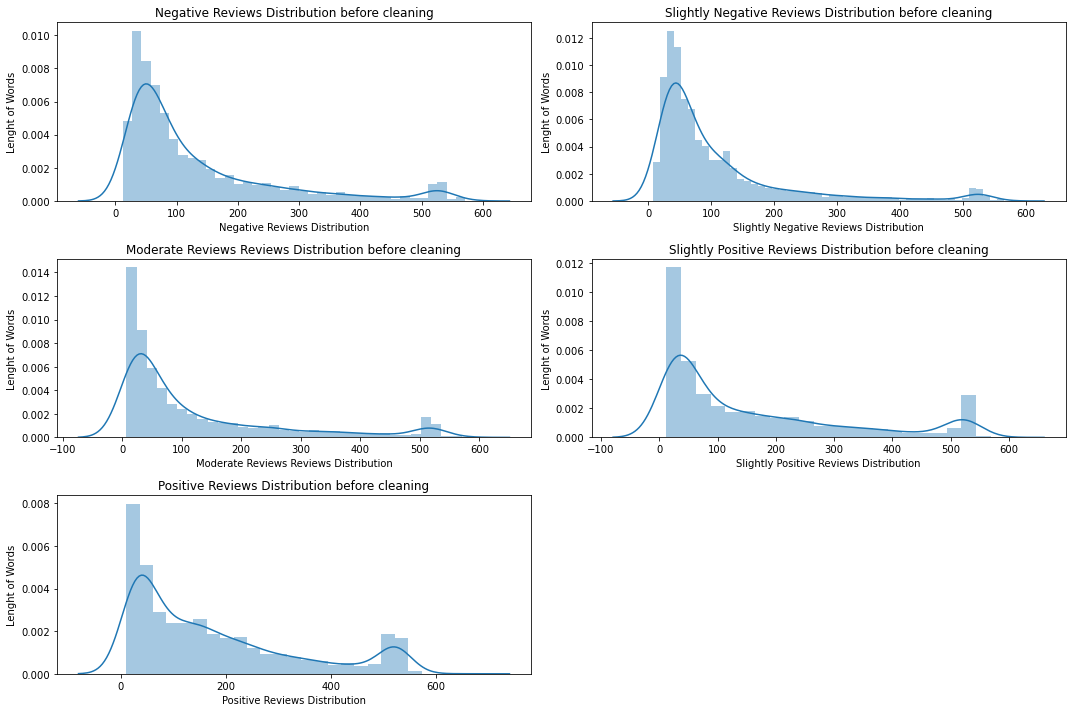

In [148]:
#Reviews distibution before cleaning
labels = ['Negative Reviews Distribution','Slightly Negative Reviews Distribution','Moderate Reviews Reviews Distribution',
          'Slightly Positive Reviews Distribution','Positive Reviews Distribution']
plt.figure(figsize= (15,10))
for i in range(len(labels)):
    plt.subplot(3,2,i+1)
    sns.distplot(df_ratings[df_ratings['Ratings']==i+1]['Concat_Length'])
    plt.title(labels[i]+" before cleaning")
    plt.xlabel(labels[i])
    plt.ylabel('Lenght of Words')
    plt.tight_layout()

## Length of Words After Cleaning based on Ratings

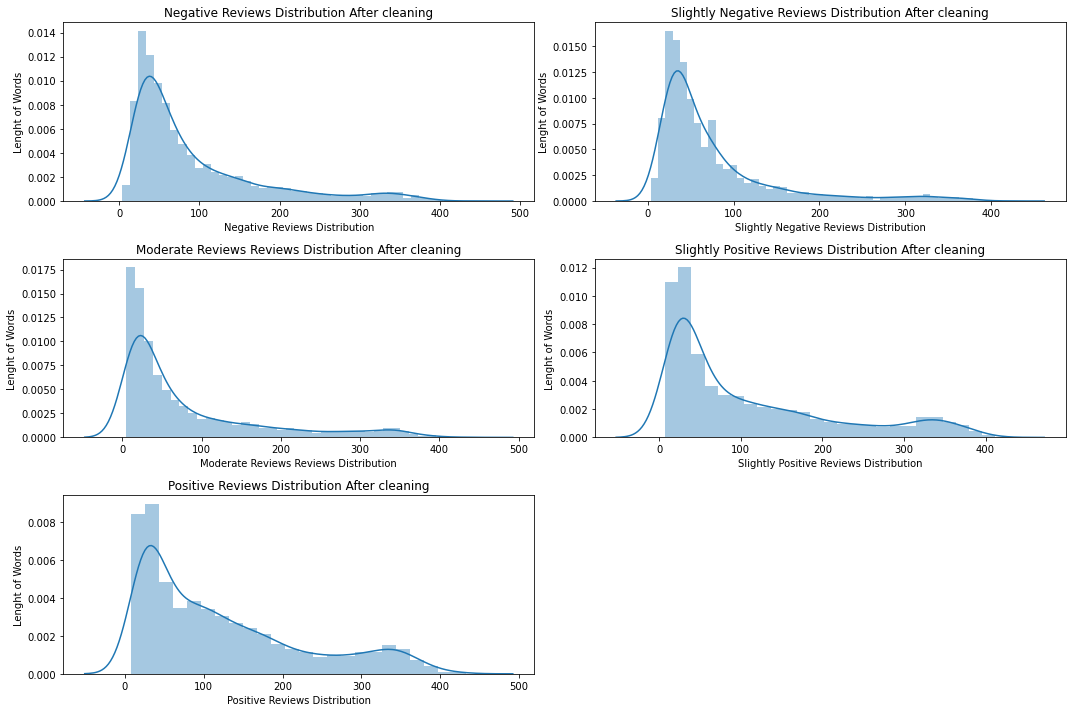

In [149]:
#Reviews distibution before cleaning
labels = ['Negative Reviews Distribution','Slightly Negative Reviews Distribution','Moderate Reviews Reviews Distribution',
          'Slightly Positive Reviews Distribution','Positive Reviews Distribution']
plt.figure(figsize= (15,10))
for i in range(len(labels)):
    plt.subplot(3,2,i+1)
    sns.distplot(df_ratings[df_ratings['Ratings']==i+1]['Length_Final'])
    plt.title(labels[i]+" After cleaning")
    plt.xlabel(labels[i])
    plt.ylabel('Lenght of Words')
    plt.tight_layout()

In [48]:
#we can see the difference the lenght of each ratings.

## Word Cloud of Positive Reviews

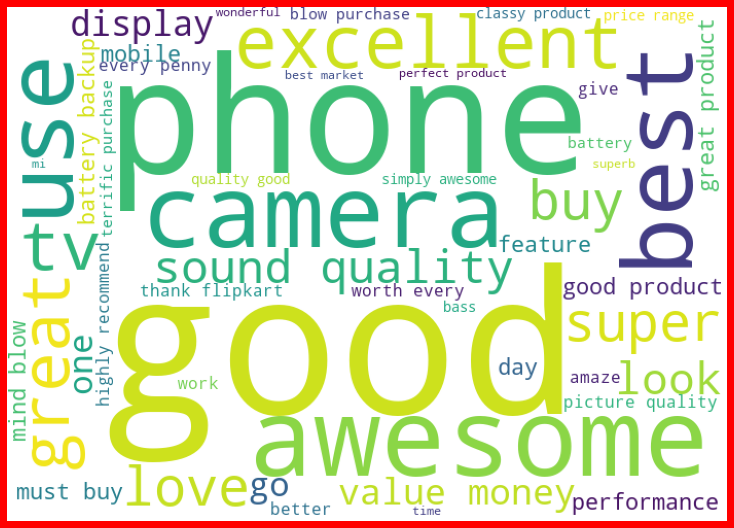

In [49]:
#wordcloud of positive reviews
from wordcloud import WordCloud

positive_reviews = df_ratings['cleaned_review'][df_ratings['Ratings'] == 5]
positive_reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(positive_reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(positive_reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Word Cloud of Negative Reviews

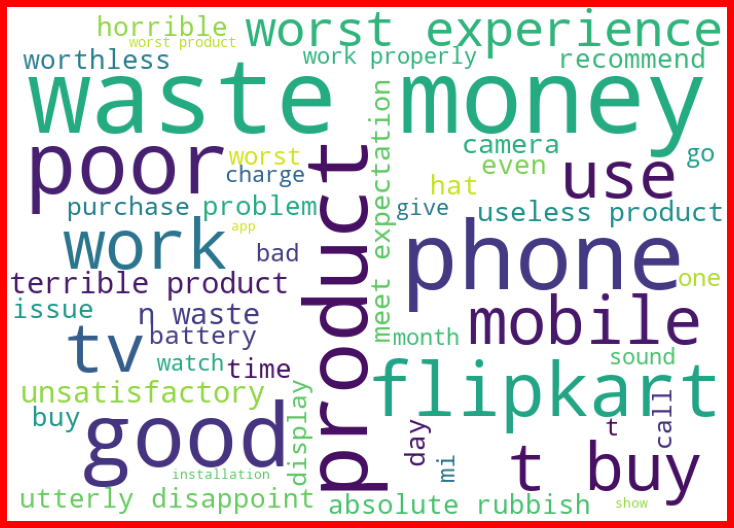

In [50]:
#wordcloud of Negative reviews
from wordcloud import WordCloud
Negative_reviews = df_ratings['cleaned_review'][df_ratings['Ratings'] == 1]
Negative_reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(Negative_reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(Negative_reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Word Cloud of Moderate Reviews

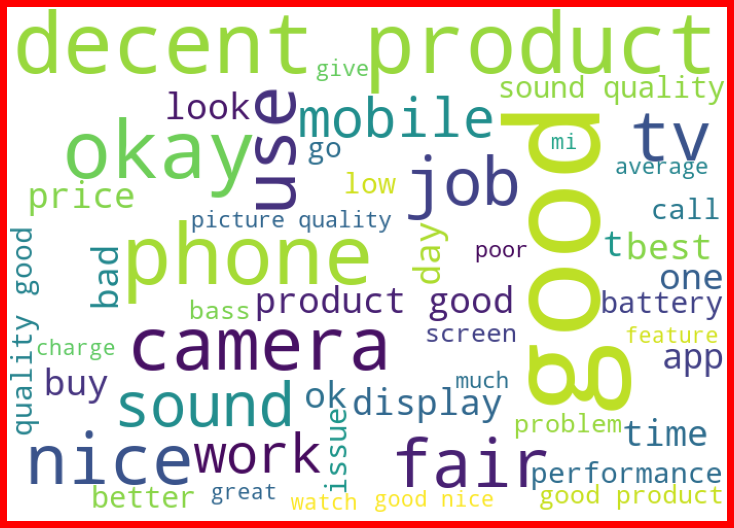

In [51]:
#wordcloud of Moderate_reviews
from wordcloud import WordCloud
Moderate_reviews = df_ratings['cleaned_review'][df_ratings['Ratings'] == 3]
Moderate_reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(Moderate_reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(Moderate_reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Model Building

In [52]:
from gensim.models import Word2Vec
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
tf_vec =TfidfVectorizer()
naive = MultinomialNB()
label = LabelEncoder()
lr = LogisticRegression()

In [53]:
#count vectorizer
count_vec = CountVectorizer()
count_vec_features = count_vec.fit_transform(df_ratings.cleaned_review)

In [54]:
#tfidf
tf_vec =TfidfVectorizer()
tf_features = tf_vec.fit_transform(df_ratings.cleaned_review)

In [55]:
#shape of array
count_vec_features.shape

(20594, 10202)

In [56]:
#shape of array
tf_features.shape

(20594, 10202)

## Naive Bayes Model with Count Vectorizer

In [57]:
#naive bayes model with count vectorizer features
X= count_vec_features
Y = df_ratings.Ratings

x_train,x_test,y_train,y_test = train_test_split(X,Y)

naive.fit(x_train,y_train)

y_pred = naive.predict(x_test)

print("Final Score = > ",accuracy_score(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Final Score = >  0.8017090697222762

               precision    recall  f1-score   support

           1       0.88      0.90      0.89      1029
           2       0.88      0.77      0.82      1067
           3       0.79      0.71      0.75      1032
           4       0.67      0.78      0.72       992
           5       0.81      0.86      0.83      1029

    accuracy                           0.80      5149
   macro avg       0.81      0.80      0.80      5149
weighted avg       0.81      0.80      0.80      5149



## Naive Bayes Model with TF-IDF Vectorizer

In [58]:
#naive bayes model with Tfidf features
X= tf_features
Y = df_ratings.Ratings

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)

naive.fit(x_train,y_train)

y_pred = naive.predict(x_test)

print("Final Score = > ",accuracy_score(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Final Score = >  0.8096717809283356

               precision    recall  f1-score   support

           1       0.88      0.91      0.89      1114
           2       0.88      0.78      0.83      1018
           3       0.82      0.71      0.76       980
           4       0.72      0.75      0.73      1027
           5       0.77      0.89      0.82      1010

    accuracy                           0.81      5149
   macro avg       0.81      0.81      0.81      5149
weighted avg       0.81      0.81      0.81      5149



## Random Forest Model with Count Vectorizer

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


X= count_vec_features
Y = df_ratings.Ratings

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)

rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print("Final Score = > ",accuracy_score(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Final Score = >  0.8731792581083706

               precision    recall  f1-score   support

           1       0.93      0.96      0.94      1114
           2       0.90      0.88      0.89      1018
           3       0.87      0.81      0.84       980
           4       0.82      0.82      0.82      1027
           5       0.84      0.89      0.87      1010

    accuracy                           0.87      5149
   macro avg       0.87      0.87      0.87      5149
weighted avg       0.87      0.87      0.87      5149



## Random Forest Model with TF-IDF

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

X= tf_features
Y = df_ratings.Ratings

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)

rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print("Final Score = > ",accuracy_score(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Final Score = >  0.8724024082346087

               precision    recall  f1-score   support

           1       0.93      0.96      0.94      1114
           2       0.91      0.86      0.88      1018
           3       0.86      0.82      0.84       980
           4       0.83      0.81      0.82      1027
           5       0.83      0.91      0.87      1010

    accuracy                           0.87      5149
   macro avg       0.87      0.87      0.87      5149
weighted avg       0.87      0.87      0.87      5149



## SVC Model with Count Vectorizer

In [61]:
from sklearn.svm import SVC

svc =  SVC()

X= count_vec_features
Y = df_ratings.Ratings

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)

svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

print("Final Score = > ",accuracy_score(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Final Score = >  0.8459895125267042

               precision    recall  f1-score   support

           1       0.95      0.89      0.92      1114
           2       0.91      0.84      0.87      1018
           3       0.86      0.78      0.82       980
           4       0.76      0.82      0.79      1027
           5       0.77      0.89      0.83      1010

    accuracy                           0.85      5149
   macro avg       0.85      0.84      0.85      5149
weighted avg       0.85      0.85      0.85      5149



## SVC Model with TF-IDF Vectorizer

In [62]:
X= tf_features
Y = df_ratings.Ratings

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)

svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

print("Final Score = > ",accuracy_score(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Final Score = >  0.866381821712954

               precision    recall  f1-score   support

           1       0.94      0.94      0.94      1114
           2       0.90      0.86      0.88      1018
           3       0.82      0.84      0.83       980
           4       0.81      0.82      0.81      1027
           5       0.86      0.87      0.86      1010

    accuracy                           0.87      5149
   macro avg       0.87      0.86      0.86      5149
weighted avg       0.87      0.87      0.87      5149



## Hyper Parameter Tuning for Random Forest with TF-IDF

In [63]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
#lets create the parameter list to pass in Randomised serach cv
parameters = {'n_estimators':[100,200,300,400,500],'criterion' : ['gini','entropy']}

In [66]:
#using grid search CV

X= tf_features
Y = df_ratings.Ratings
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)

gsv = GridSearchCV(estimator= rf , param_grid=parameters,cv =5)
gsv.fit(x_train,y_train) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [67]:
gsv.best_params_

{'criterion': 'gini', 'n_estimators': 400}

In [68]:
gsv.best_score_

0.8686953706701198

## Creating the ranfom forest model using the attributes obtained form Randomized search Cv

In [69]:
rf_final  = RandomForestClassifier(criterion='gini',n_estimators = 400)

X= tf_features
Y = df_ratings.Ratings

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)

rf_final.fit(x_train,y_train)

y_pred = rf_final.predict(x_test)

print("Final Score = > ",accuracy_score(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Final Score = >  0.8774519324140609

               precision    recall  f1-score   support

           1       0.94      0.96      0.95      1114
           2       0.92      0.86      0.89      1018
           3       0.87      0.82      0.84       980
           4       0.83      0.82      0.83      1027
           5       0.83      0.91      0.87      1010

    accuracy                           0.88      5149
   macro avg       0.88      0.88      0.88      5149
weighted avg       0.88      0.88      0.88      5149



In [103]:
from sklearn.metrics import confusion_matrix
print("confusion matrix = >\n ",confusion_matrix(y_test,rf_final.predict(x_test)))

confusion matrix = >
  [[1070   15    4    7   18]
 [  51  878   62   12   15]
 [  17   42  805   77   39]
 [   2   15   43  847  120]
 [   0    1   16   75  918]]


## Cross validation Score Random Forest

In [70]:
from sklearn.model_selection import cross_val_score


cv_score = cross_val_score(rf_final,x_train,y_train,cv =5)
print("cross val score :",  cv_score.mean())

cross val score : 0.8675299449660084


## Hyper Parameter Tuning for SVC with TF-IDF

In [73]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
#lets create the parameter list to pass in Randomised serach cv

parameters = {'kernel':['linear','poly','rbf']}

gsv = GridSearchCV(estimator= svc , param_grid=parameters,cv =5)
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf']})

In [74]:
gsv.best_params_

{'kernel': 'rbf'}

## Creating the SVC model using the attributes obtained form Randomized search Cv

In [75]:
svc_final  = SVC(kernel='rbf')

X= tf_features
Y = df_ratings.Ratings

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)

svc_final.fit(x_train,y_train)

y_pred = svc_final.predict(x_test)

print("Final Score = > ",accuracy_score(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Final Score = >  0.866381821712954

               precision    recall  f1-score   support

           1       0.94      0.94      0.94      1114
           2       0.90      0.86      0.88      1018
           3       0.82      0.84      0.83       980
           4       0.81      0.82      0.81      1027
           5       0.86      0.87      0.86      1010

    accuracy                           0.87      5149
   macro avg       0.87      0.86      0.86      5149
weighted avg       0.87      0.87      0.87      5149



In [76]:
#compare to both random forest and svm, Random forest has more accuracy of 87.7 percent. 

## Saving the model:

In [77]:
#serialization using joblib
import joblib
joblib.dump(rf_final,'Rating_prediction.obj')

['Rating_prediction.obj']

In [78]:
Rating_prediction = joblib.load('Rating_prediction.obj')

In [79]:
accuracy_score(Rating_prediction.predict(x_test),y_test)

0.8774519324140609

## Conclusion

In [81]:
#lets create function to provide ratings for user review

#Function to Check if a if review is negative or postive
def check_review():
    review = input("Please enter your Review based on the Movie: \n\n")
    passing_list = ["Null"]
    passing_list[0] = review    
    review_fetures = tf_vec.transform(passing_list)
    test = review_fetures.toarray()
    result = Rating_prediction.predict(test)
    if result[0] == 1:
        return "Negative Review (1 Rating)"
    elif result[0] == 2:
        return "Slightly Negative Review (2 Rating)"
    elif result[0] == 3:
        return "Moderate Review (3 Rating)"
    elif result[0] == 4:
        return "Slightly Positive Review (4 Rating)"
    else:
        return "Positve Review (5 Rating)"
check_review()

Please enter your Review based on the Movie: 

really nice good mobile poco pros fullhd display smooth tocuh response battery avarage weight back disign amazing heatting issue decent back camera excellent sound quality s clear cons front camara take clear picture charging time long charging time hour minutes ovarall price segment mobile good


'Slightly Positive Review (4 Rating)'

In [82]:
df_ratings.iloc[:5,[0,6]]

,Ratings,Review_Final
0,5,highly recommended great phone price point sup...
1,4,really nice good mobile poco pros fullhd displ...
2,5,wonderful good phone battery camera price poin...
3,5,terrific one word review `` value money potent...
4,4,worth money sound quality super type sound cam...


In [83]:
df_ratings.iloc[1,6]

'really nice good mobile poco pros fullhd display smooth tocuh response battery avarage weight back disign amazing heatting issue decent back camera excellent sound quality s clear cons front camara take clear picture charging time long charging time hour minutes ovarall price segment mobile good'

## Fuction to check Review  With Voice Recognition 

In [100]:
#please speak in hindi to give a review and it will converted to english and based on review the rarting will br given
import speech_recognition as sr
from textblob import TextBlob

def kannada_review():
    
    r  = sr.Recognizer()
    
    with sr.Microphone() as source:
        print("start talking")
        audio_text = r.listen(source,timeout=2,phrase_time_limit=10)

        try:
            final_text = r.recognize_google(audio_text,language='kn')
            print(final_text)
            
            
            #textblob for language conversion
            blob = TextBlob(final_text)
            converted_text = blob.translate(to='en')
            print(converted_text)
            converted_text = str(converted_text)
            print(converted_text)

            passing_list = ["Null"]
            passing_list[0] = converted_text    
            review_fetures = tf_vec.transform(passing_list)  #tfidf trained model
            test = review_fetures.toarray()
            result = Rating_prediction.predict(test)
            if result[0] == 1:
                return "Negative Review (1 Rating)"
            elif result[0] == 2:
                return "Slightly Negative Review (2 Rating)"
            elif result[0] == 3:
                return "Moderate Review (3 Rating)"
            elif result[0] == 4:
                return "Slightly Positive Review (4 Rating)"
            else:
                return "Positve Review (5 Rating)"
            
        except:
            print("Sorry.... speak again")
#calling the func                        
kannada_review()

start talking
ತುಂಬಾ ಇಷ್ಟವಾಯಿತು ತುಂಬಾ ಅದ್ಭುತವಾದ ಫೋನ್ ಯಾಕೆಂದರೆ ಒಂದು ವರ್ಷ ನಾನು ಇದನ್ನು ಬಳಸಿದ ನಂತರವೂ ಏನು ಆಗಿಲ್ಲ
Loved it so much because it's a fantastic phone and not a thing after I use it for a year
Loved it so much because it's a fantastic phone and not a thing after I use it for a year


'Slightly Positive Review (4 Rating)'